<a href="https://colab.research.google.com/github/Park-hanna/BDA_study/blob/main/Forecasting/Rossmann_Store_Sales___Time_Series_Analysis_and_Forecasts_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# import matplotlib.font_manager as fm
# from matplotlib import pyplot as plt

# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# plt.rc('font', family=font_name)

In [ ]:
from matplotlib import pyplot as plt
plt.rc('font', family='NaumBarunGothic')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from prophet import Prophet

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Data/drugstore data/train.csv',
                    parse_dates = True, low_memory = False, index_col = 'Date')

store = pd.read_csv('/content/drive/MyDrive/Data/drugstore data/store.csv',
                    low_memory = False)

train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

In [ ]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

In [ ]:
print('Data Shape : ', train.shape)
train.head(5)

Data Shape :  (1017209, 12)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31


## Create New Column

In [ ]:
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

## Cumulative Distribution Graph

Text(0.5, 0, 'Salse per Customer')

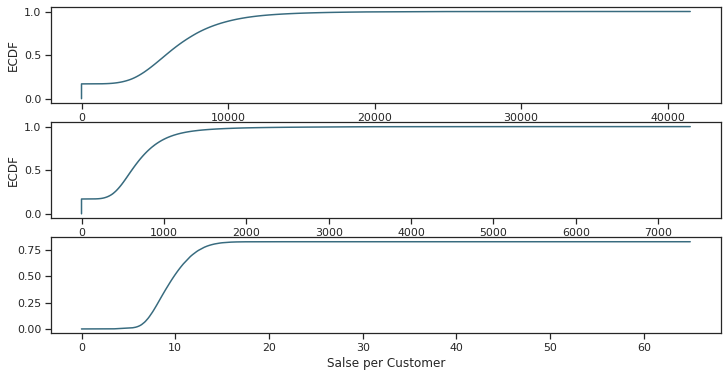

In [ ]:
sns.set(style = 'ticks')
c = '#386B7F'
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = 'statmodels', color = c)
plt.xlabel('Sales'); plt.ylabel('ECDF')

plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = 'statmodels', color = c)
plt.xlabel('Customers'); plt.ylabel('ECDF')

plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = 'statmodels', color = c)
plt.xlabel('Salse per Customer')

## Filtering

In [ ]:
train[(train.Open == 0) & (train.Sales == 0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-31,876,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-29,292,3,0,0,0,1,0,1,2015,7,29,31,NaN


In [ ]:
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print('Data Shape : ', zero_sales)
zero_sales.head(5)

Data Shape :              Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-05-15    971          5      0          0     1      0            0   
2015-03-26    674          4      0          0     1      0            0   
2015-02-05    699          4      0          0     1      1            0   
2014-10-01    708          3      0          0     1      1            0   
2014-09-22    357          1      0          0     1      0            0   
2014-09-11    227          4      0          0     1      0            0   
2014-09-11    835          4      0          0     1      0            0   
2014-09-10    835          3      0          0     1      0            0   
2014-09-05    548          5      0          0     1      1            0   
2014-09-04     28          4      0          0     1      1            0   
2014-09-03     28          3      0          0     1      1            0  

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-05-15,971,5,0,0,1,0,0,1,2015,5,15,20,NaN
2015-03-26,674,4,0,0,1,0,0,0,2015,3,26,13,NaN
2015-02-05,699,4,0,0,1,1,0,0,2015,2,5,6,NaN
2014-10-01,708,3,0,0,1,1,0,0,2014,10,1,40,NaN
2014-09-22,357,1,0,0,1,0,0,0,2014,9,22,39,NaN


In [ ]:
# 폐업 상점 제외
train = train[(train['Open'] != 0) & (train['Sales'] != 0)]
print('Data Shape : ', train.shape)

Data Shape :  (844338, 13)


In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## Missing Value

In [ ]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


### missing value processing

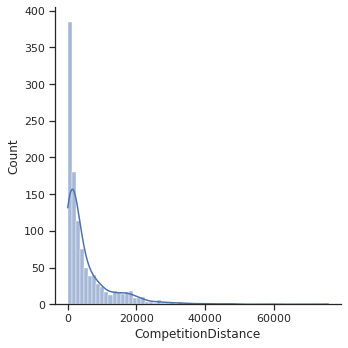

In [ ]:
sns.displot(store['CompetitionDistance'], kde=True)

In [ ]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [ ]:
_ = store[pd.isnull(store.Promo2SinceWeek)]
_[_.Promo2 != 0].shape

(0, 10)

In [ ]:
store.fillna(0, inplace = True)

## Data Merge

In [ ]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

print("Data Shape : ", train_store.shape)
train_store.head()

Data Shape :  (844338, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
train_store.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
Year                           int64
Month                          int64
Day                            int64
WeekOfYear                     int64
SalePerCustomer              float64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

# EDA

Store Types

In [ ]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [ ]:
train_store.groupby('StoreType')['Customers','Sales'].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943



## Sales by store type by month

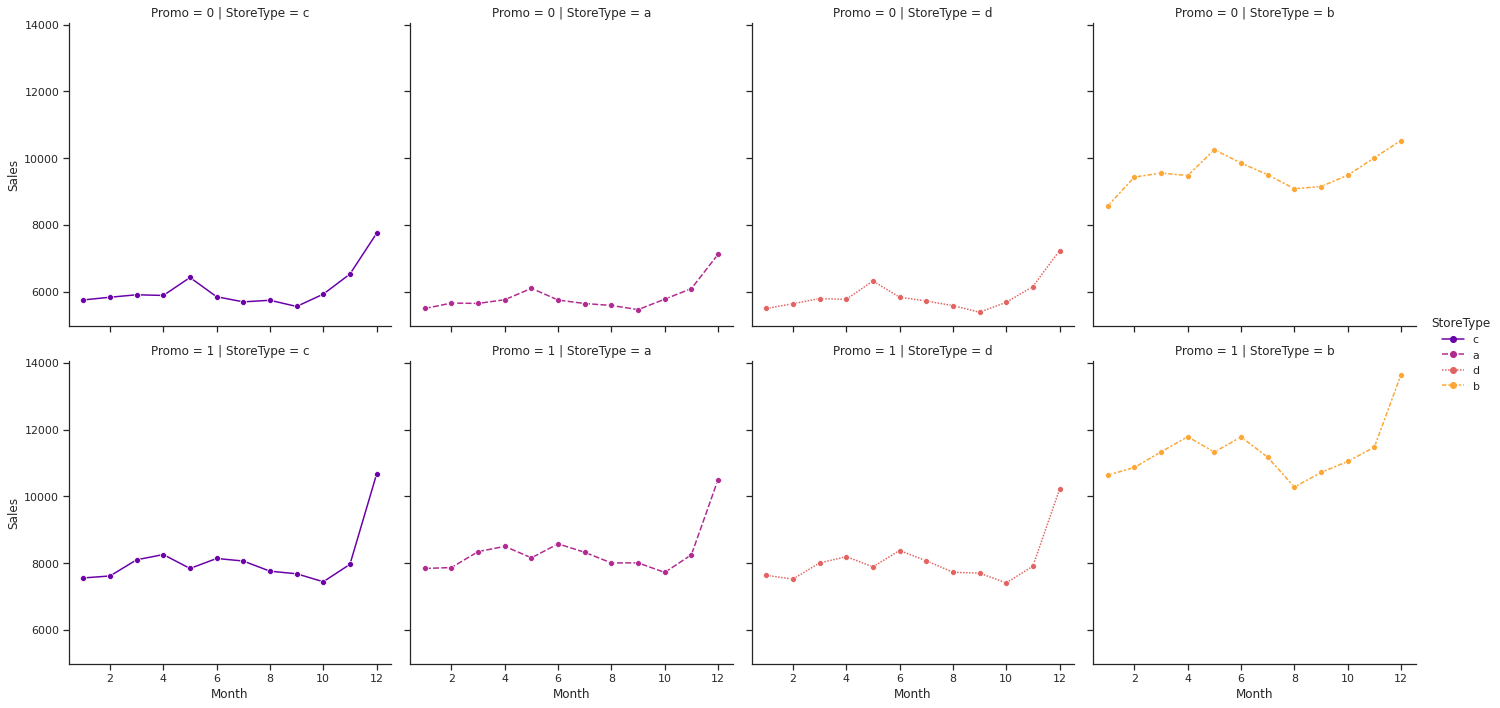

In [ ]:
sns.relplot(data = train_store, x = 'Month', y = "Sales",
               col = 'StoreType',
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo',
               kind = 'line',
               markers = "o",
               ci = None,
               style="StoreType",)


## Customers by store type by month

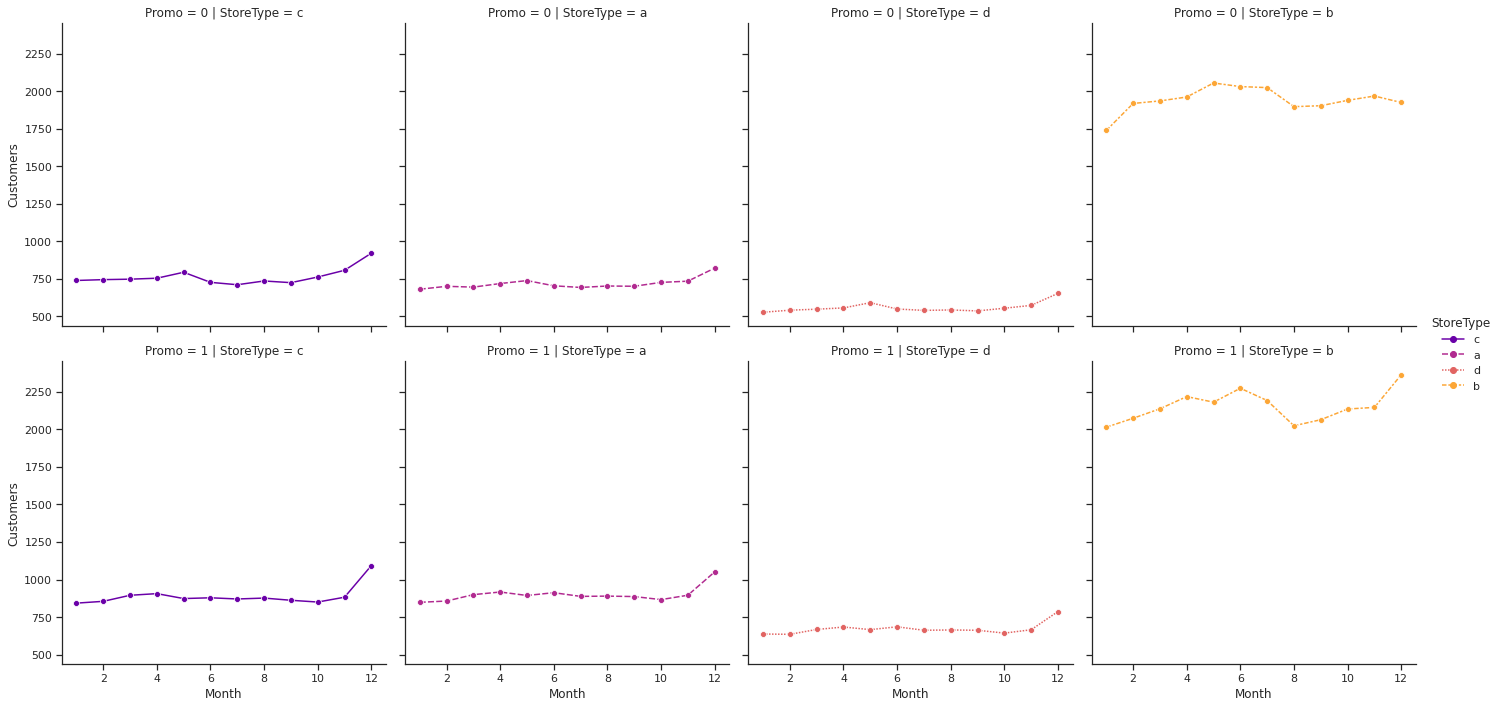

In [ ]:
sns.relplot(data = train_store, x = 'Month', y='Customers',
           col = "StoreType", palette = 'plasma', hue = 'StoreType',
           style = 'StoreType', row = 'Promo', kind = 'line',
           ci = None, markers = 'o')

## Sales per Customer by store type by month

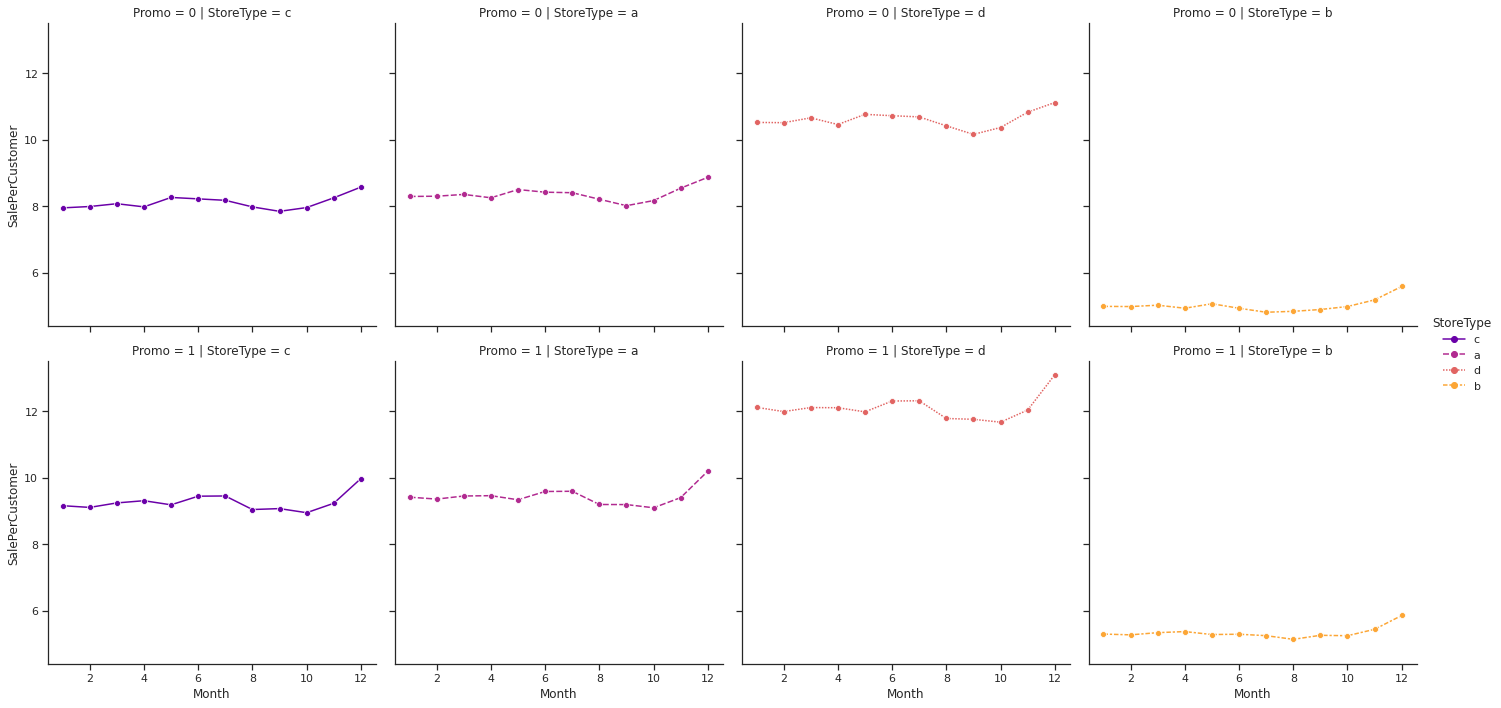

In [ ]:
sns.relplot(data = train_store, x = 'Month', y='SalePerCustomer',
           col = "StoreType", palette = 'plasma', hue = 'StoreType',
           style = 'StoreType', row = 'Promo', kind = 'line',
           ci = None, markers = 'o')

## Sales by store type by week

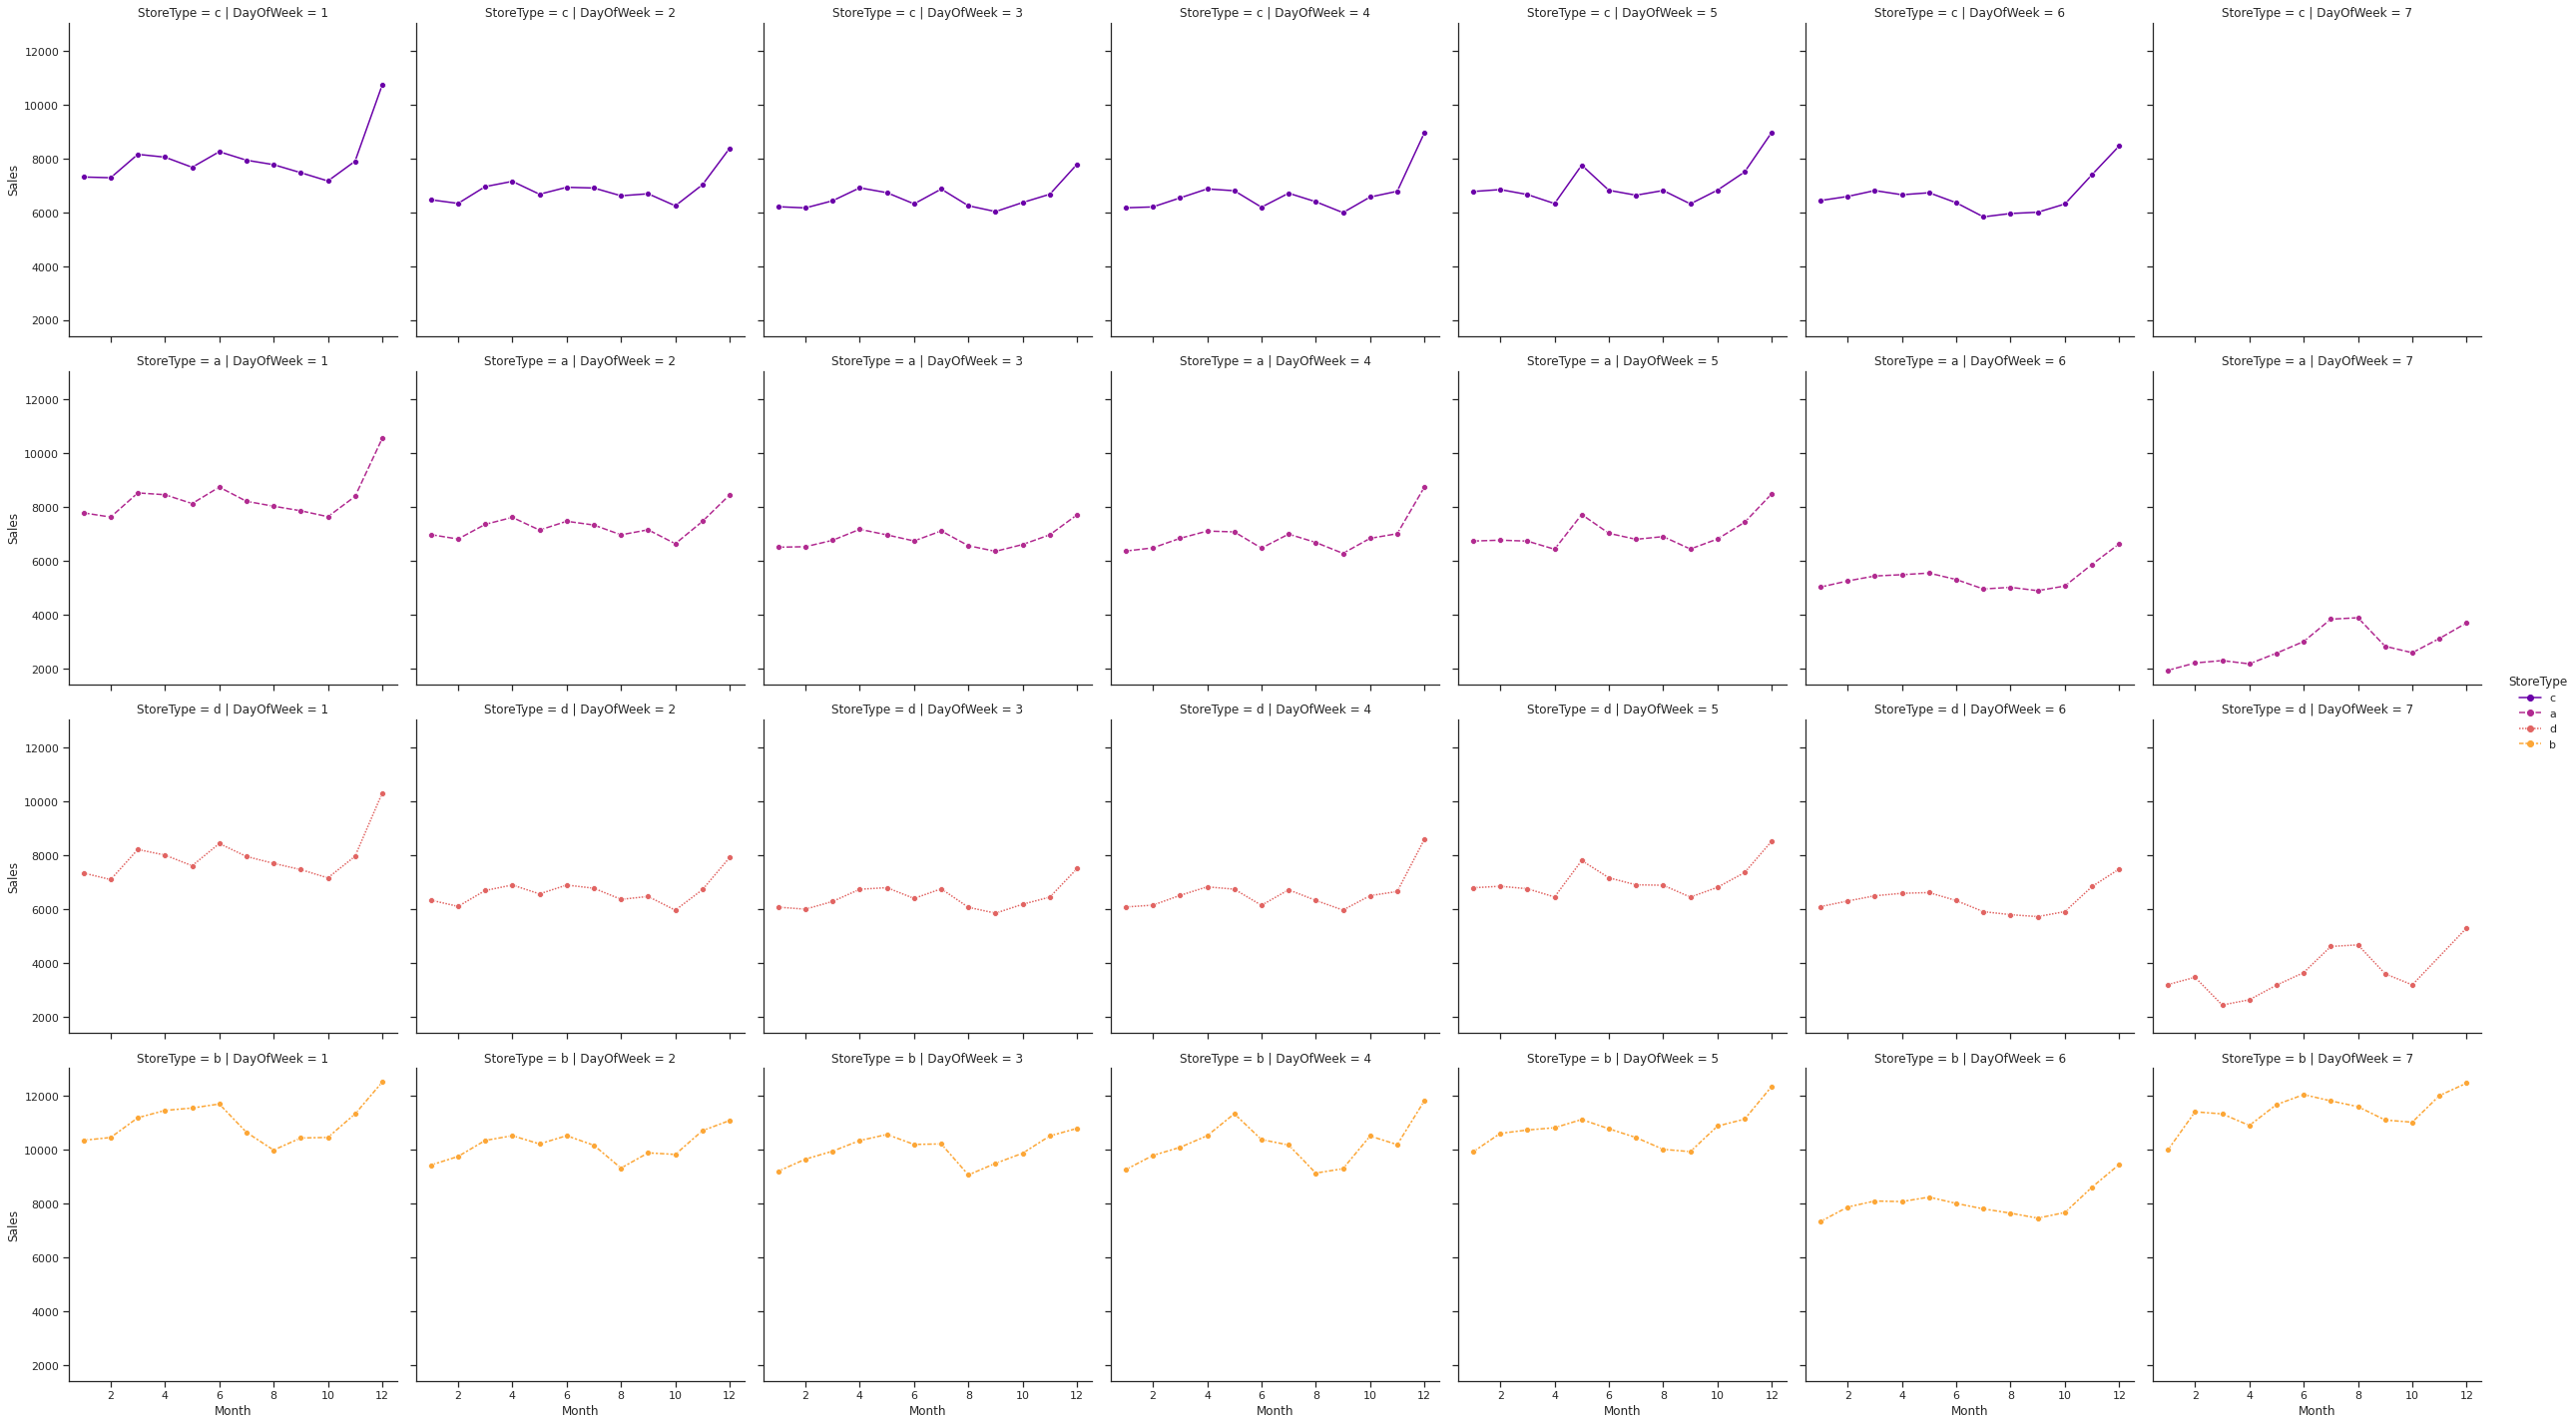

In [ ]:
sns.relplot(data = train_store, x = 'Month', y='Sales',
           col = "DayOfWeek", palette = 'plasma', hue = 'StoreType',
           style = 'StoreType', row = 'StoreType', kind = 'line',
           ci = None, markers = 'o')

## Shop open on Sunday

In [ ]:
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099])

In [ ]:
train_store.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
Year                           int64
Month                          int64
Day                            int64
WeekOfYear                     int64
SalePerCustomer              float64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)

train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

train_store.fillna(0, inplace = True)

train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,12918.492198,7115.514452
b,10233.380141,2022.211825,17199.328069,11364.495244
c,6933.126425,815.538073,12158.636107,6745.418694
d,6822.300064,606.353935,10421.916846,9028.526526


# Correlational Analysis

## HeatMap

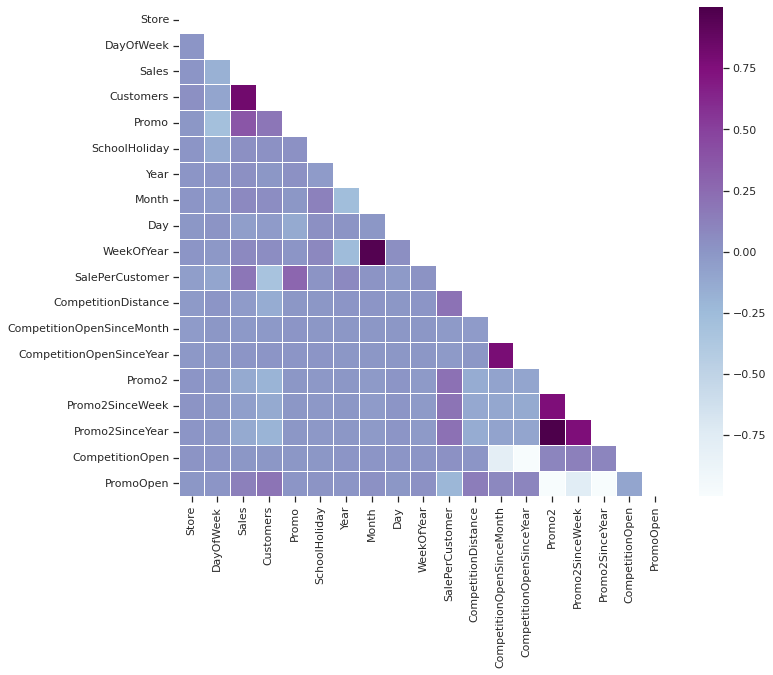

In [ ]:
corr_all = train_store.drop('Open', axis = 1).corr()

mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

sns.heatmap(corr_all, mask = mask,
            square = True, linewidth = .5, ax = ax, cmap = 'BuPu')
plt.show()

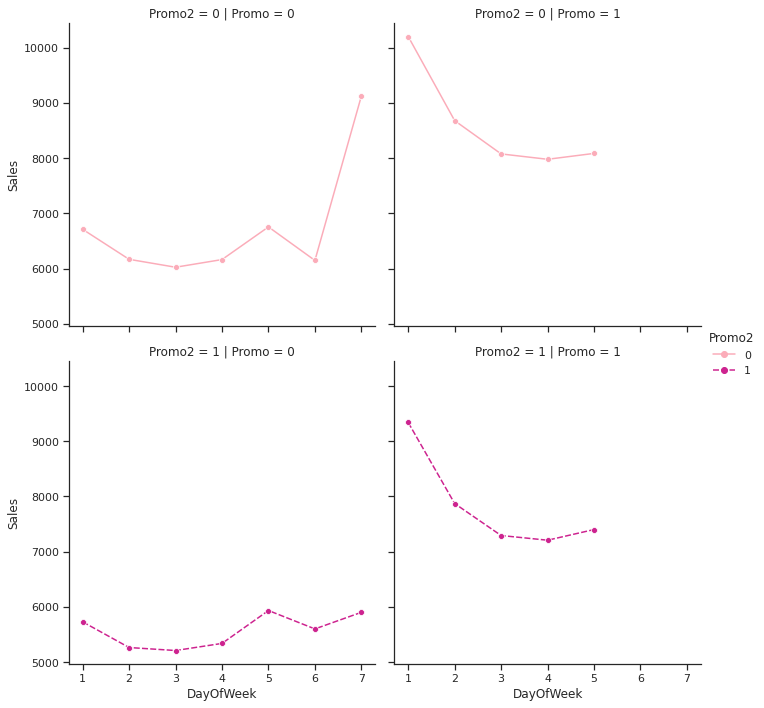

In [ ]:
sns.relplot(data = train_store, x = 'DayOfWeek', y = 'Sales', col = 'Promo',
            row = 'Promo2', hue = 'Promo2', palette = 'RdPu', style = 'Promo2',
            ci = None, markers = 'o', kind = 'line')

# Time-Series Analysis per Store Type

## Seasonality
* Store number 2 for Store Type A
* Store number 85 for Store Type B
* Store number 1 for Store Type C
* Store number 13 for Store Type D

<Axes: xlabel='Date'>

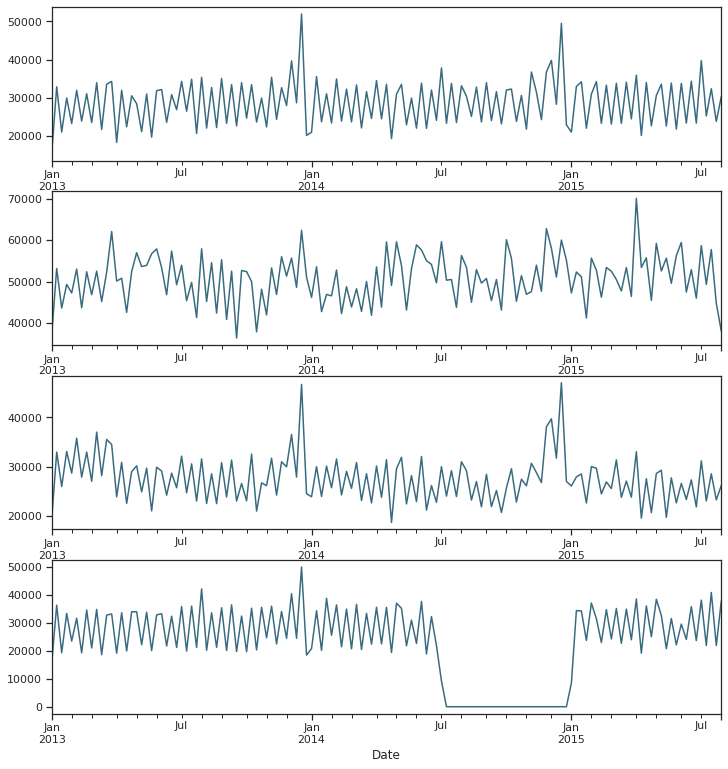

In [ ]:
# prepration : input should be float type

train['Sales'] = train['Sales'] * 1.0

# Store Types
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True)
# Solve the reverse order
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# Store Types
sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)

## Yearly Trend

<Axes: xlabel='Date'>

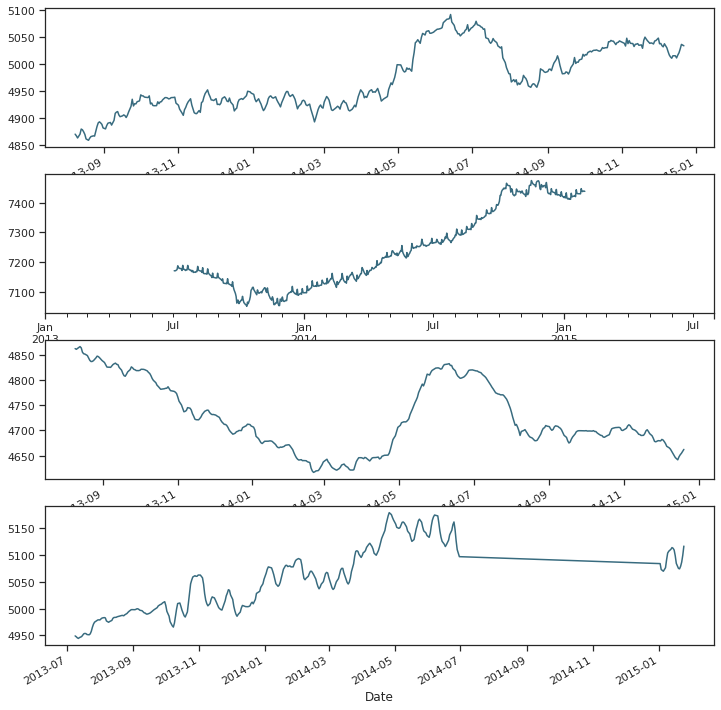

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', period = 365)
decomposition_a.trend.plot(color = c, ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', period = 365)
decomposition_b.trend.plot(color = c, ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', period = 365)
decomposition_c.trend.plot(color = c, ax = ax3)

decomposition_d = seasonal_decompose(sales_d, model = 'additive', period = 310)
decomposition_d.trend.plot(color = c, ax = ax4)

# Auto Correlation

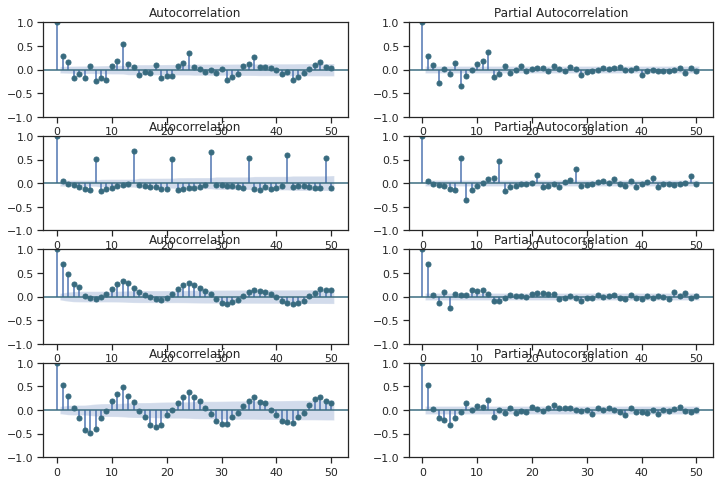

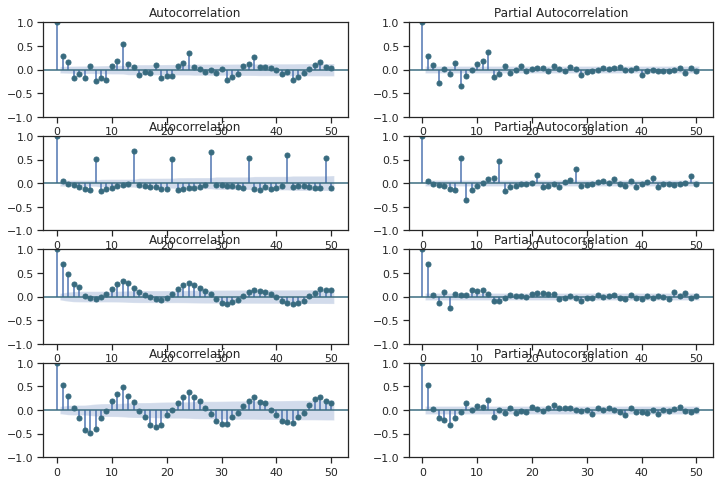

In [ ]:
plt.figure(figsize = (12, 8))

# acf and pacf for A
plt.subplot(421) ; plot_acf(sales_a, lags = 50, ax = plt.gca(), color = c )
plt.subplot(422) ; plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = c )

# acf and pacf for B
plt.subplot(423) ; plot_acf(sales_b, lags = 50, ax = plt.gca(), color = c )
plt.subplot(424) ; plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = c )

# acf and pacf for C
plt.subplot(425) ; plot_acf(sales_c, lags = 50, ax = plt.gca(), color = c )
plt.subplot(426) ; plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = c )

# acf and pacf for D
plt.subplot(427) ; plot_acf(sales_d, lags = 50, ax = plt.gca(), color = c )
plt.subplot(428) ; plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = c )

plt.show()

# Time Series Analysis and Forecasting with Prophet

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/drugstore data/train.csv',
                 low_memory = False)

df = df[(df['Open'] != 0) & (df['Sales'] != 0)]

sales = df[df.Store == 1].loc[:, ['Date', 'Sales']]

sales = sales.sort_index(ascending = False)

sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [ ]:
sales = sales.rename(columns = {'Date' : 'ds', 'Sales' : 'y'})

sales.head()

,ds,y
1014980,2013-01-02,5530
1013865,2013-01-03,4327
1012750,2013-01-04,4486
1011635,2013-01-05,4997
1009405,2013-01-07,7176


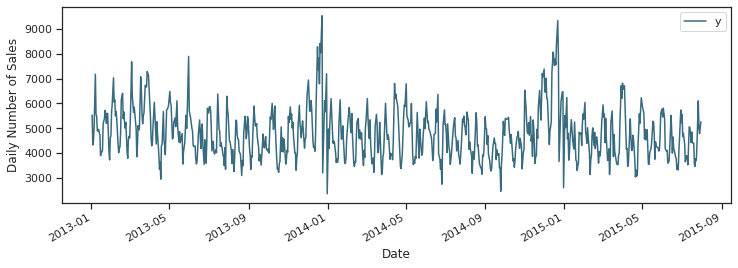

In [ ]:
ax = sales.set_index('ds').plot(figsize=(12, 4), color = c)
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

# Modeling Holidays

In [ ]:
state_dates = df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') & (df.StateHoliday == 'c')].loc[:, 'Date'].values
school_dates = df[df.SchoolHoliday == 1].loc[:, 'Date'].values

state = pd.DataFrame({'holiday' : 'state_holiday', 'ds' : pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday' : 'school_holiday', 'ds' : pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


In [ ]:
my_model = Prophet(interval_width = 0.95, holidays = holidays)
my_model.fit(sales)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8sin11m/2jjm0bwf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8sin11m/5l371su8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50789', 'data', 'file=/tmp/tmpb8sin11m/2jjm0bwf.json', 'init=/tmp/tmpb8sin11m/5l371su8.json', 'output', 'file=/tmp/tmpb8sin11m/prophet_modelu78uci10/prophet_model-20230317083758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:37:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:37:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = my_model.make_future_dataframe(periods = 6*7)


In [ ]:
print('First week to forecast.')
future_dates.tail(7)

First week to forecast.


,ds
816,2015-09-05
817,2015-09-06
818,2015-09-07
819,2015-09-08
820,2015-09-09
821,2015-09-10
822,2015-09-11


In [ ]:
forecast = my_model.predict(future_dates)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
816,2015-09-05,4092.423961,2220.452463,5760.518841
817,2015-09-06,4087.223216,2508.374772,5732.186178
818,2015-09-07,4161.830504,2605.263173,5858.830258
819,2015-09-08,3664.307760,1897.321632,5144.517044
820,2015-09-09,3551.151099,1929.009005,5155.339378
821,2015-09-10,3462.643712,1727.753435,5108.151298
822,2015-09-11,3717.281789,2151.575964,5307.435870


In [ ]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date' : 'ds', 'Forecast' : 'yhat'})

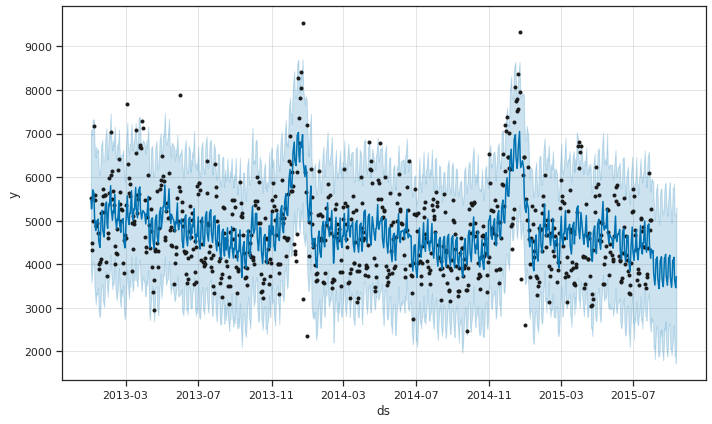

In [ ]:
my_model.plot(forecast);

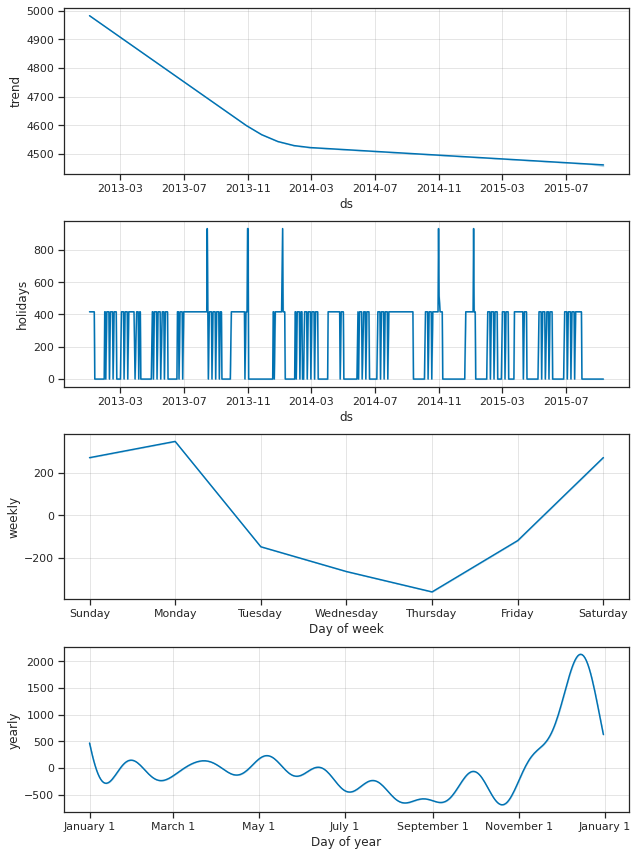

In [ ]:
my_model.plot_components(forecast);

## Advantages
* A powerful tool for the time series forecasting as it accounts for time dependencies, seasonalities and holidays (Prophet: manually).
* Easily implemented with R auto.arima() from forecast package, which runs a complex grid search and sophisticated algorithm behind the scene.
## Drawbacks
* Doesn't catch interactions between external features, which could improve the forecasting power of a model. In our case, these variables are Promo and CompetitionOpen.
* Even though Prophet offers an automated solution for ARIMA, this methodology is under development and not completely stable.
* Fitting seasonal ARIMA model needs 4 to 5 whole seasons in the dataset, which can be the biggest drawback for new companies.
* Seasonal ARIMA in Python has 7 hyper parameters which can be tuned only manually affecting significantly the speed of the forecasting process.